In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from DateTime import DateTime

The goal of this analysis is to check if higher taxes account for higher revenue

In [35]:
df_low = pd.read_csv('IITTRLB.csv')
df_high = pd.read_csv('IITTRHB.csv')
df_incometax = pd.read_csv('A074RC1Q027SBEA.csv')

In [36]:
df_high['DATE'] = pd.to_datetime(df_high['DATE'])
df_low['DATE'] = pd.to_datetime(df_low['DATE'])
df_incometax['DATE'] = pd.to_datetime(df_incometax['DATE'])

In [37]:
df_high = df_high.set_index('DATE')
df_low = df_low.set_index('DATE')
df_incometax = df_incometax.set_index('DATE')

In [38]:
df = df_high.join(df_low).join(df_incometax)

In [43]:
df.dropna(inplace=True)

In [47]:
df.columns = ['High_Bracket','Low_Bracket','Revenue']

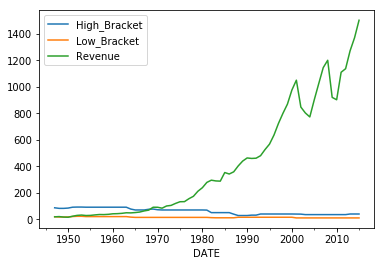

In [56]:
df.plot()

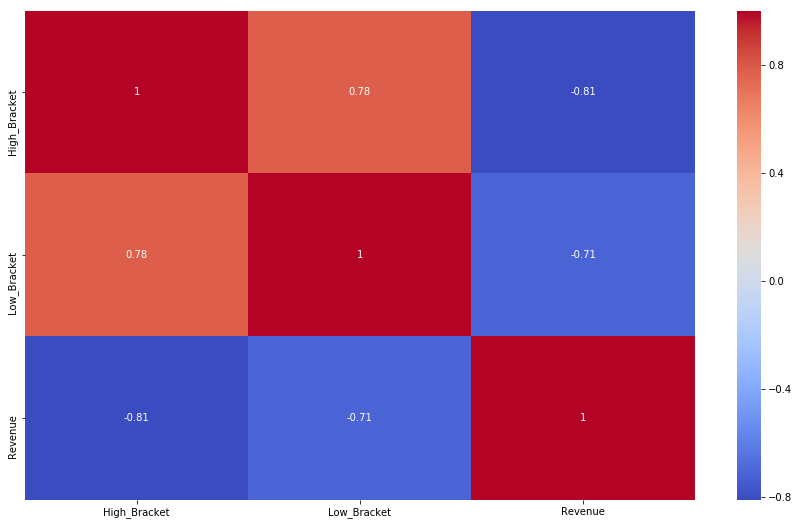

In [46]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

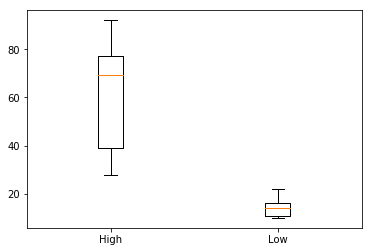

In [57]:
plt.boxplot([df['High_Bracket'], df['Low_Bracket']])
plt.xticks([1,2], ['High','Low'])
plt.show()

In [59]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [-12.19054575 -23.40464527]
intercept: 1475.3806909644227
score: 0.670664521360423


In [61]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()
hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [-14.22442711   0.31053632]
intercept: 1226.9485853104445
score: 0.6484016532557559
